# librosa自学ノート

## ライブラリと音データの入力

In [4]:
import librosa
import matplotlib.pyplot as plt
y, sr = librosa.load('sample_audio_01.wav')

`y` には音声データが入る。振幅値が連続したnumpy.array。  
`sr`にはサンプリングレート値（1秒間の音声データ数）が入る。

In [5]:
y

array([-4.7913814e-04, -9.8902744e-04, -4.8240958e-04, ...,
        3.3055894e-05,  1.2210270e-05,  0.0000000e+00], dtype=float32)

In [6]:
sr

22050

## 音データの波形を描画
librosa.loadで呼んだ音声データはSin波のグラフを描くことができます。

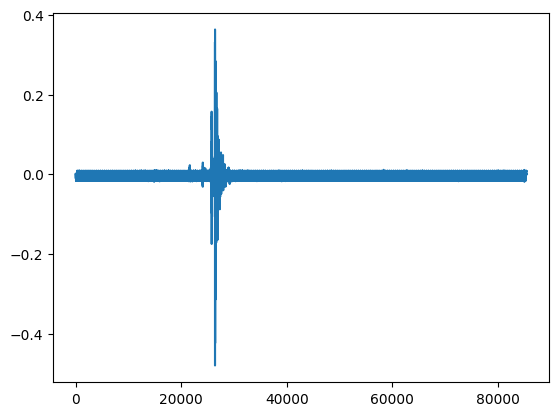

In [7]:
plt.plot(y)
plt.show()

## ~~振幅の平均値を計算~~
~~音声データ毎に振幅の平均値を計算し、他のデータと比べることによって音に特徴があるか確認することができます。~~  
~~音声データが多数あれば機械学習のデータに使えます。~~

**現在調整中**

In [8]:
# import numpy as np
# y_mean = np.sqrt(np.mean(y=y**2, axis=1))

## ゼロクロス数を計算
ゼロクロス数は雑音の入り具合が分かる数値で、これを音声データ毎に計算し他のデータと比べて特徴がないか見るということをします。  
音声データが多数あれば機械学習のデータとして使えます。

In [9]:
zc = librosa.zero_crossings(y)
zc

array([ True, False, False, ..., False, False, False])

## メルスペクトログラムを計算
音声波形を複数のsin波に分解し周波数と振幅と時間の情報を持たせ、さらに高音低音で粗さを考慮したデータをメルスペクトログラムといいます。  
可視化して特徴を見たり、機械学習のデータとして使います。

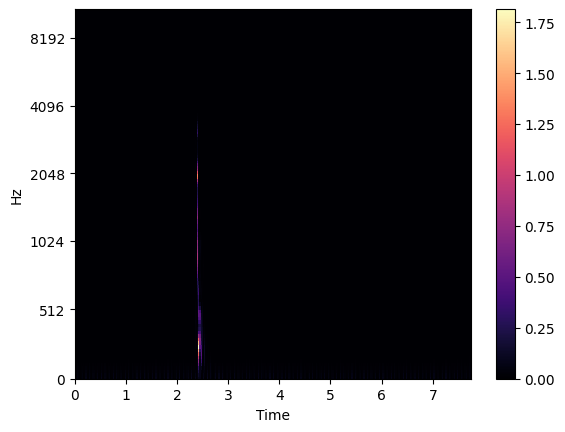

In [10]:
import librosa.display
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, win_length=256, hop_length=256)
img = librosa.display.specshow(S, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(img)
plt.show()

~~「コイーン」の「コ」が若干低いヘルツで、「イーン」が高いヘルツになっているのが分かる。~~  
`coin.mp3`は現在使用していません

## メルスペクトログラムのパワーをdB単位に変換

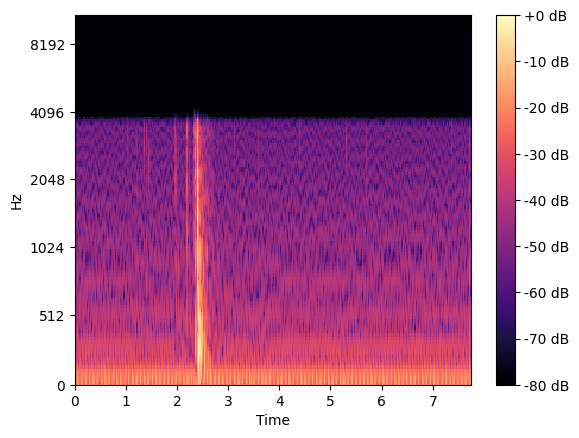

In [11]:
import numpy as np
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(img, format='%+2.0f dB')
plt.show()

明らかにこっちの方が分類しやすそう。